AI-generated notebook: Please use with caution
This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Please be cautious when interpreting the code or results.

# Dandiset 000673: Exploring Data for Control of Working Memory by Phase–Amplitude Coupling of Human Hippocampal Neurons

This notebook provides an initial exploration of Dandiset 000673, which contains data related to the control of working memory by phase-amplitude coupling of human hippocampal neurons. The dataset includes electrophysiological recordings and behavioral data from a Sternberg task performed on human subjects.

More information about the Dandiset can be found at: [https://dandiarchive.org/dandiset/000673](https://dandiarchive.org/dandiset/000673)

## Instructions
Before running this notebook, ensure you have the following packages installed:
```bash
pip install pynwb h5py remfile dandi seaborn matplotlib pandas
```

You can install them using pip:
```bash
pip install pynwb h5py remfile dandi seaborn matplotlib pandas
```

In [1]:
import pynwb
import h5py
import remfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from dandi.dandiapi import DandiAPIClient

## 1. Introduction to the Dandiset

### 1.1. Loading Dandiset Metadata

First, let's load the Dandiset metadata to get an overview of the dataset.

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
metadata = dandiset.get_metadata()
print(metadata)

id='DANDI:000673/0.250122.0110' schemaKey='Dandiset' schemaVersion='0.6.4' name='Data for: Control of working memory by phase–amplitude coupling of human hippocampal neurons' description='Retaining information in working memory is a demanding process that relies on cognitive control to protect memoranda-specific persistent activity from interference. However, how cognitive control regulates working memory storage is unclear. Here we show that interactions of frontal control and hippocampal persistent activity are coordinated by theta–gamma phase–amplitude coupling (TG-PAC). We recorded single neurons in the human medial temporal and frontal lobe while patients maintained multiple items in their working memory. In the hippocampus, TG-PAC was indicative of working memory load and quality. We identified cells that selectively spiked during nonlinear interactions of theta phase and gamma amplitude. The spike timing of these PAC neurons was coordinated with frontal theta activity when cogni

### 1.2. Displaying Dandiset Description

Now, let's print the description of the Dandiset to understand its purpose and content.

In [3]:
print(metadata.description)

Retaining information in working memory is a demanding process that relies on cognitive control to protect memoranda-specific persistent activity from interference. However, how cognitive control regulates working memory storage is unclear. Here we show that interactions of frontal control and hippocampal persistent activity are coordinated by theta–gamma phase–amplitude coupling (TG-PAC). We recorded single neurons in the human medial temporal and frontal lobe while patients maintained multiple items in their working memory. In the hippocampus, TG-PAC was indicative of working memory load and quality. We identified cells that selectively spiked during nonlinear interactions of theta phase and gamma amplitude. The spike timing of these PAC neurons was coordinated with frontal theta activity when cognitive control demand was high. By introducing noise correlations with persistently active neurons in the hippocampus, PAC neurons shaped the geometry of the population code. This led to hig

### 1.3. Keywords

Let's display the keywords associated with the Dandiset

In [4]:
print(metadata.keywords)

['cognitive neuroscience', 'data standardization', 'working memory', 'neurophysiology', 'neurosurgery', 'NWB', 'open source', 'single-neurons', 'phase-amplitude coupling']


## 2. Exploring the Dataset Structure

### 2.1. Listing Assets

Next, let's list the assets (files) available in the Dandiset. This will help us identify the NWB files we can explore.

In [5]:
assets = list(dandiset.get_assets())
for asset in assets:
    print(asset.path)

sub-11/sub-11_ses-1_ecephys+image.nwb
sub-12/sub-12_ses-1_ecephys+image.nwb
sub-1/sub-1_ses-1_ecephys+image.nwb
sub-1/sub-1_ses-2_ecephys+image.nwb
sub-10/sub-10_ses-1_ecephys+image.nwb
sub-12/sub-12_ses-2_ecephys+image.nwb
sub-14/sub-14_ses-1_ecephys+image.nwb
sub-13/sub-13_ses-1_ecephys+image.nwb
sub-15/sub-15_ses-1_ecephys+image.nwb
sub-16/sub-16_ses-1_ecephys+image.nwb
sub-18/sub-18_ses-1_ecephys+image.nwb
sub-17/sub-17_ses-1_ecephys+image.nwb
sub-2/sub-2_ses-1_ecephys+image.nwb
sub-19/sub-19_ses-2_ecephys+image.nwb
sub-19/sub-19_ses-1_ecephys+image.nwb
sub-20/sub-20_ses-1_ecephys+image.nwb
sub-22/sub-22_ses-1_ecephys+image.nwb
sub-22/sub-22_ses-2_ecephys+image.nwb
sub-22/sub-22_ses-3_ecephys+image.nwb
sub-21/sub-21_ses-1_ecephys+image.nwb
sub-23/sub-23_ses-1_ecephys+image.nwb
sub-25/sub-25_ses-1_ecephys+image.nwb
sub-24/sub-24_ses-1_ecephys+image.nwb
sub-26/sub-26_ses-1_ecephys+image.nwb
sub-27/sub-27_ses-1_ecephys+image.nwb
sub-26/sub-26_ses-2_ecephys+image.nwb
sub-28/sub-28_ses-

### 2.2. Loading an NWB File

Now, let's load an NWB file from the Dandiset and explore its structure. We will use the file `sub-1/sub-1_ses-1_ecephys+image.nwb` for this demonstration.

In [6]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/pynwb/ecephys.py:109: UserWarning: ElectricalSeries 'LFPs': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  warnings.warn("%s '%s': The second dimension of data does not match the length of electrodes. "


### 2.3. NWB File Contents

Let's print the contents of the NWB file

In [7]:
print(nwb)

root pynwb.file.NWBFile at 0x123972413464480
Fields:
  acquisition: {
    LFPs <class 'pynwb.ecephys.ElectricalSeries'>,
    events <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    NLX-microwires-129 <class 'pynwb.device.Device'>,
    NLX-microwires-130 <class 'pynwb.device.Device'>,
    NLX-microwires-131 <class 'pynwb.device.Device'>,
    NLX-microwires-132 <class 'pynwb.device.Device'>,
    NLX-microwires-133 <class 'pynwb.device.Device'>,
    NLX-microwires-134 <class 'pynwb.device.Device'>,
    NLX-microwires-135 <class 'pynwb.device.Device'>,
    NLX-microwires-136 <class 'pynwb.device.Device'>,
    NLX-microwires-137 <class 'pynwb.device.Device'>,
    NLX-microwires-138 <class 'pynwb.device.Device'>,
    NLX-microwires-140 <class 'pynwb.device.Device'>,
    NLX-microwires-141 <class 'pynwb.device.Device'>,
    NLX-microwires-142 <class 'pynwb.device.Device'>,
    NLX-microwires-143 <class 'pynwb.device.Device'>,
    NLX-microwires-144 <class 'pynwb.device.Device'>,
    NLX-m

### 2.4. Displaying Session Description

Display the session description

In [8]:
print(nwb.session_description)

SBCAT_ID: 1


### 2.5. Displaying Experiment Description

Display the experiment description

In [9]:
print(nwb.experiment_description)

This data contains electrophysiological recordings and behavior from the Sternberg task performed in patients with intractable epilepsy implanted with depth electrodes and Behnke-Fried microwires in the human medial temporal lobe and medial frontal cortex.


### 2.6. Electrode Groups

Let's explore the electrode groups in the NWB file

In [10]:
print(nwb.electrode_groups)

{'NLX-microwires-129': NLX-microwires-129 pynwb.ecephys.ElectrodeGroup at 0x123972395044400
Fields:
  description: Microwire
  device: NLX-microwires-129 pynwb.device.Device at 0x123972395227168
Fields:
  description: Recordings were performed with Macro-Micro Hybrid Depth Electrodes with Behnke Fried/Micro Inner Wire Bundle in which each individual microwire has a diameter of 40 microns. Likwise, each Depth Electrode has 8 microwires.

  location: dorsal_anterior_cingulate_cortex_left
, 'NLX-microwires-130': NLX-microwires-130 pynwb.ecephys.ElectrodeGroup at 0x123972395046800
Fields:
  description: Microwire
  device: NLX-microwires-130 pynwb.device.Device at 0x123972395227936
Fields:
  description: Recordings were performed with Macro-Micro Hybrid Depth Electrodes with Behnke Fried/Micro Inner Wire Bundle in which each individual microwire has a diameter of 40 microns. Likwise, each Depth Electrode has 8 microwires.

  location: dorsal_anterior_cingulate_cortex_left
, 'NLX-microwires

## 3. Accessing and Visualizing Data

### 3.1. Accessing LFP Data

Let's access the local field potential (LFP) data from the NWB file.

In [11]:
lfps = nwb.acquisition['LFPs']
print(lfps)

LFPs pynwb.ecephys.ElectricalSeries at 0x123972401221696
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (550276, 70), type "<f8">
  description: These are LFP recordings that have spike potentials removed and is downsampled to 400Hz
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  offset: 0.0
  rate: 400.0
  resolution: -1.0
  starting_time: 1.55e-05
  starting_time_unit: seconds
  unit: volts



### 3.2. Exploring LFP Data Attributes

Let's look at some attributes of the LFP data, such as the starting time, rate and unit

In [12]:
print(f"Starting time: {lfps.starting_time}")
print(f"Rate: {lfps.rate}")
print(f"Unit: {lfps.unit}")
print(f"Data shape: {lfps.data.shape}")

Starting time: 1.55e-05
Rate: 400.0
Unit: volts
Data shape: (550276, 70)


### 3.3. Visualizing LFP Data

It is good practice to visualize the data, which can help reveal useful information about the data and assist in the discovery of errors.
Load a small subset of the LFP data and plot it.
Note: Loading all the LFP data would require a substantial amount of memory, so we are only loading a small subset.

/tmp/ipykernel_28093/633455672.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


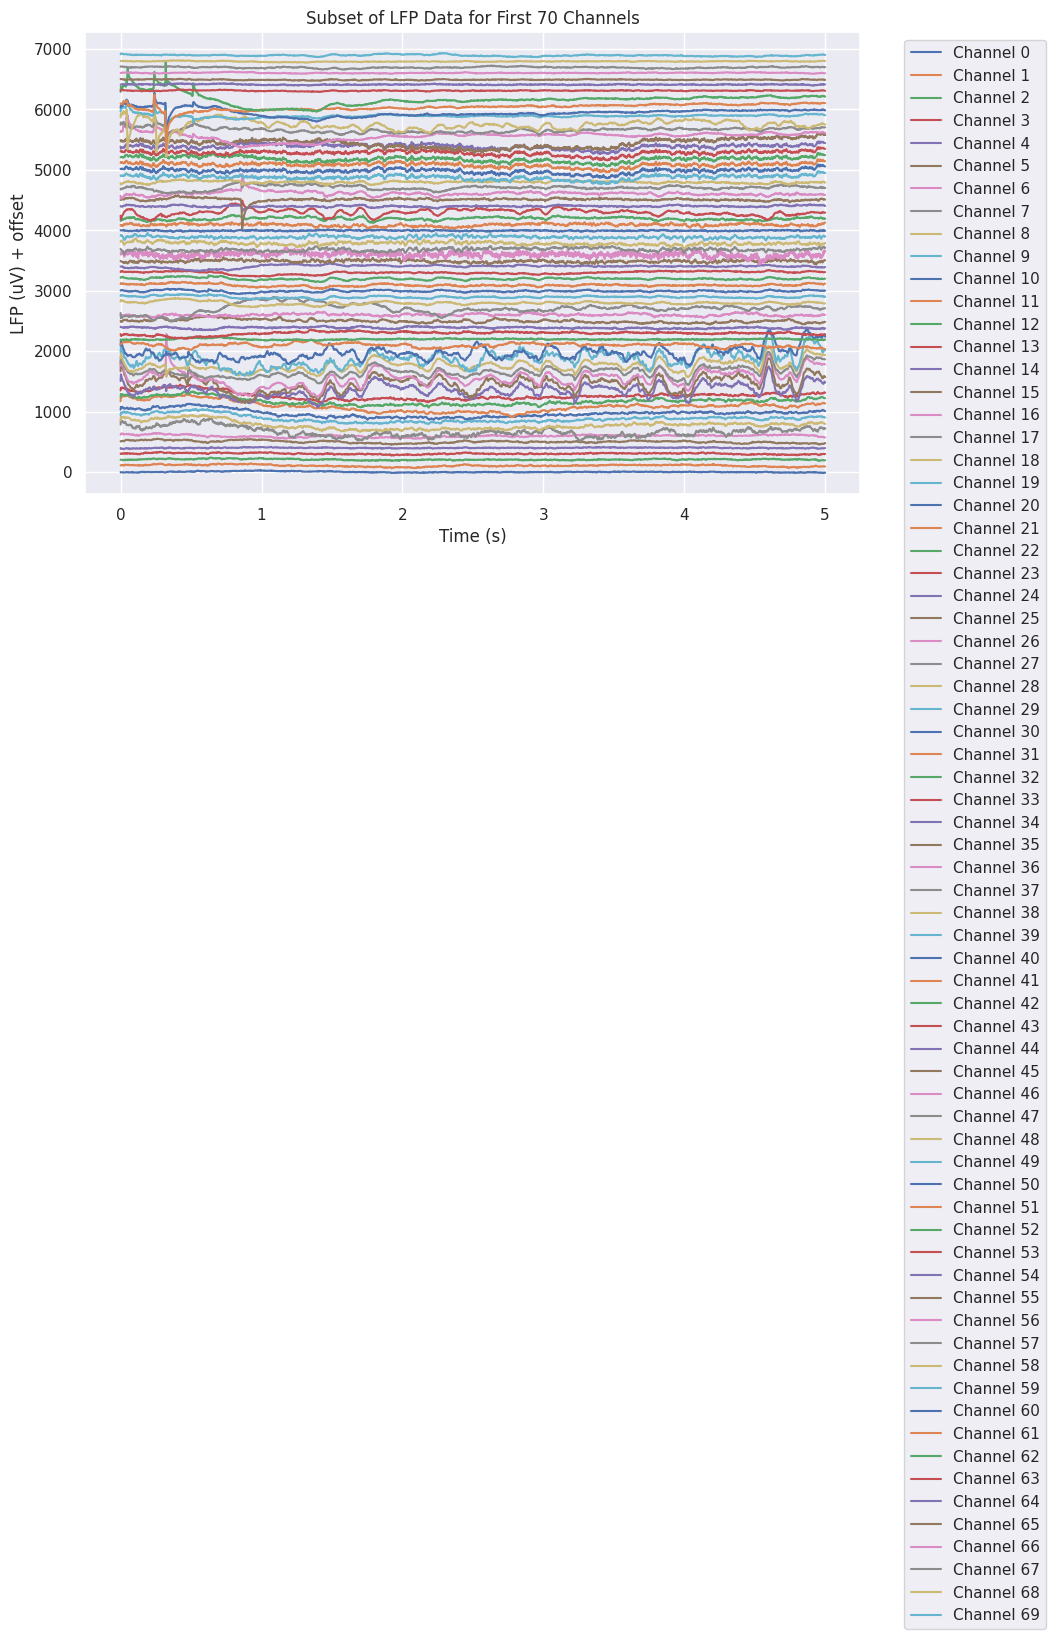

In [13]:
# Load a subset of the LFP data
num_channels = 70  # Number of channels to plot
time_window = 5  # Time window in seconds
start_time = 0  # Starting time in seconds
start_index = int(start_time * lfps.rate)
end_index = start_index + int(time_window * lfps.rate)
lfp_data = lfps.data[start_index:end_index, :num_channels]

# Create a time vector
if lfps.timestamps is not None:
    lfp_timestamps = lfps.timestamps[start_index:end_index]
    time_vector = lfp_timestamps - lfp_timestamps[0]
else:
    time_vector = np.linspace(start_time, start_time + time_window, end_index - start_index)

# Plot the LFP data
plt.figure(figsize=(10, 6))
for i in range(num_channels):
    plt.plot(time_vector, lfp_data[:, i] + i*100 , label=f"Channel {i}") # Adding offset for each channel
plt.xlabel("Time (s)")
plt.ylabel("LFP (uV) + offset")
plt.title("Subset of LFP Data for First 70 Channels")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

### 3.4. Accessing Event Data

Accessing event data to do analysis locked to task events

In [14]:
events = nwb.acquisition['events']
print(events)

events pynwb.base.TimeSeries at 0x123972400067264
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (982,), type "|i1">
  description: The events coorespond to the TTL markers for each trial. The TTL markers are the following: 61 = Start of Experiment, 11 = Fixation Cross, 1 = Picture #1 Shown, 2 = Picture #2 Shown, 3 = Picture #3 Shown, 5 = Transition between each picture presentation, 6 = End of Encoding Sequence / Start of Maintenance Period, 7 = Probe Stimulus, 8 = Subject Response, 60 = End of Experiment 
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (982,), type "<f8">
  timestamps_unit: seconds
  unit: NA



### 3.5. Exploring Event Data Attributes

Let's look at some attributes of the event data.

In [15]:
print(f"Timestamps unit: {events.timestamps_unit}")
print(f"Data shape: {events.data.shape}")
print(f"Timestamps shape: {events.timestamps.shape}")

Timestamps unit: seconds
Data shape: (982,)
Timestamps shape: (982,)


### 3.6. Visualizing Event Data

Let's plot the event data in relation to LFP data.
Note: Loading all the event data would require a substantial amount of memory, so we are only loading a small subset.

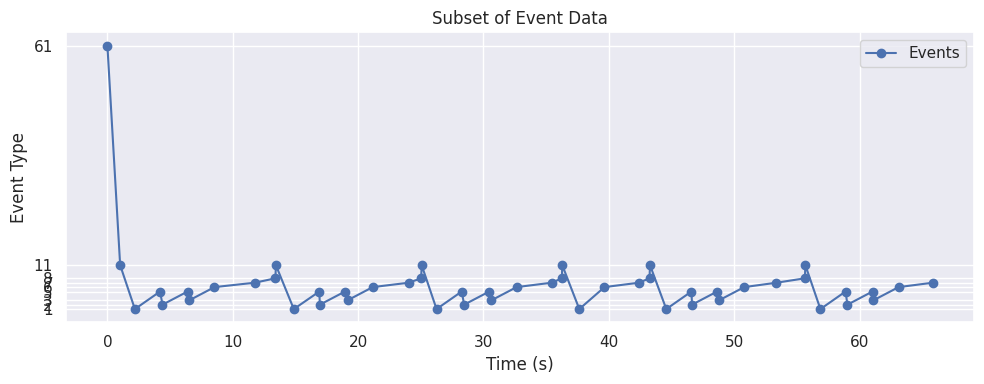

In [16]:
# Load a subset of the event data
num_events = 50  # Number of events to plot
event_data = events.data[:num_events]
event_timestamps = events.timestamps[:num_events]

# Plot the event timestamps
plt.figure(figsize=(10, 4))
plt.plot(event_timestamps, event_data, marker='o', linestyle='-', label='Events')
plt.xlabel("Time (s)")
plt.ylabel("Event Type")
plt.title("Subset of Event Data")
plt.yticks(sorted(list(set(event_data))))  # Show only unique event types
plt.legend()
plt.tight_layout()
plt.show()

### 3.7. Accessing Stimulus Presentation Data

Accessing data related to when the stimuli were presented.

In [17]:
stimulus_presentation = nwb.stimulus['StimulusPresentation']
print(stimulus_presentation)

StimulusPresentation pynwb.image.IndexSeries at 0x123972399804832
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (560,), type "<u4">
  description: Presentation order of the stimulus. Indexes 'StimulusTemplates'.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (560,), type "<f8">
  timestamps_unit: seconds
  unit: N/A



### 3.8. Exploring Stimulus Presentation Data Attributes

Let's inspect some attributes about the stimulus presentations

In [18]:
print(f"Timestamps unit: {stimulus_presentation.timestamps_unit}")
print(f"Data shape: {stimulus_presentation.data.shape}")
print(f"Timestamps shape: {stimulus_presentation.timestamps.shape}")
print(f"Description: {stimulus_presentation.description}")

Timestamps unit: seconds
Data shape: (560,)
Timestamps shape: (560,)
Description: Presentation order of the stimulus. Indexes 'StimulusTemplates'.


### 3.9. Visualizing Stimulus Presentation Data

Let's visualize the stimulus presentation data.
Note: Loading all the stimulus presentation data would require a substantial amount of memory, so we are only loading a small subset.

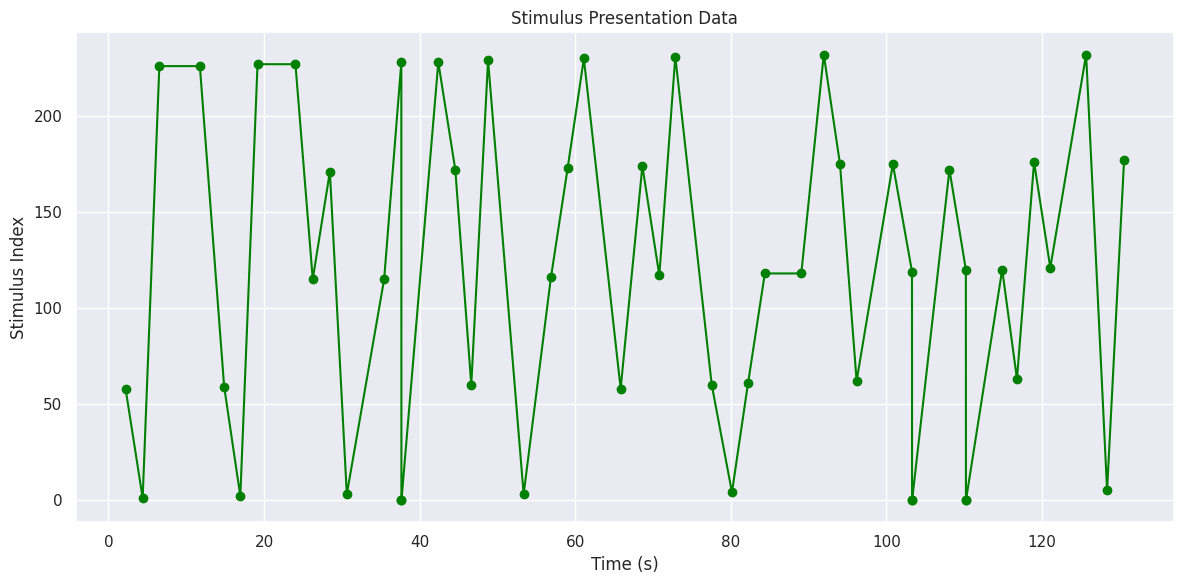

In [19]:
# Load a subset of the stimulus presentation data
num_presentations = 50

stimulus_data = stimulus_presentation.data[:num_presentations]
stimulus_timestamps = stimulus_presentation.timestamps[:num_presentations]

# Create a basic plot
plt.figure(figsize=(12, 6))
plt.plot(stimulus_timestamps, stimulus_data, marker='o', linestyle='-', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Stimulus Index')
plt.title('Stimulus Presentation Data')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.10. Superimposing Stimulus Templates of the Same Type

Let's plot a single superposition of image masks of image type 101.

In [20]:
# Access the StimulusTemplates images
stimulus_templates = nwb.stimulus_template["StimulusTemplates"]
image_101 = stimulus_templates.images["image_101"]
print(image_101)

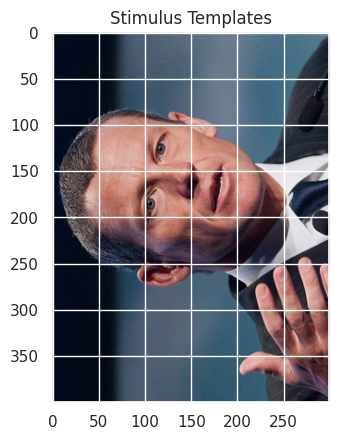

In [21]:
# Plot the single superposition of image masks
plt.imshow(image_101[:])
plt.title('Stimulus Templates')
plt.show()